# Assignment 2

Exercise 1

Luiz Mattos

In [1]:
## Initial Imports
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
import sklearn.metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Loading dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [3]:
## Associating to dictionaries
unsupervised_luiz = {
    'images':train_x
}

supervised_luiz = {
    'images':test_x,
    'labels':test_y
}

In [4]:
## Checking the shapes
print(('Shape of unsupervised:',unsupervised_luiz['images'].shape))
print(('Shape of supervised:',supervised_luiz['images'].shape))

('Shape of unsupervised:', (60000, 28, 28))
('Shape of supervised:', (10000, 28, 28))


In [5]:
## Pre Processing dataset, converting into 0-1
unsupervised_luiz['images'] = unsupervised_luiz['images']/255.0
supervised_luiz['images'] = supervised_luiz['images']/255.0

In [6]:
## Using one-hot encode the labels
supervised_luiz['labels'] = tf.keras.utils.to_categorical(supervised_luiz['labels'])

In [7]:
## Checking the shapes
print('Unsupervised Image Images:',unsupervised_luiz['images'].shape)
print('Supervised Image Images:',supervised_luiz['images'].shape)
print('Supervised Image Labels:',supervised_luiz['labels'].shape)

Unsupervised Image Images: (60000, 28, 28)
Supervised Image Images: (10000, 28, 28)
Supervised Image Labels: (10000, 10)


In [8]:
## Splitting the unsupervised dataset
unsupervised_train_luiz, unsupervised_val_luiz = train_test_split(unsupervised_luiz['images'], 
                                                             train_size=0.95, random_state = 8)

In [9]:
## Discarding 7000 samples
x_new, _ = train_test_split(supervised_luiz['images'], test_size=7000)
y_new, _ = train_test_split(supervised_luiz['labels'], test_size=7000)

In [10]:
## Splitting supervised into training, validation and testing.
## Training - 60%
x_train_luiz, x_val_luiz,y_train_luiz, y_val_luiz = train_test_split(x_new, y_new, train_size=0.60, random_state=8)                             

In [11]:
## Validation and testing = 40%
x_val_luiz, x_test_luiz, y_val_luiz, y_test_luiz = train_test_split(x_val_luiz, y_val_luiz, train_size = 0.50, random_state=12) 

In [12]:
## Printing the shape
print("Unsupervised train:", unsupervised_train_luiz.shape)
print("Unsupervised validation:", unsupervised_val_luiz.shape)
print("X train:", x_train_luiz.shape)
print("X validation:", x_val_luiz.shape)
print("X Test:", x_test_luiz.shape)
print("Y train:", y_train_luiz.shape)
print("Y validation:", y_val_luiz.shape)
print("Y test:", y_test_luiz.shape)

Unsupervised train: (57000, 28, 28)
Unsupervised validation: (3000, 28, 28)
X train: (1800, 28, 28)
X validation: (600, 28, 28)
X Test: (600, 28, 28)
Y train: (1800, 10)
Y validation: (600, 10)
Y test: (600, 10)


In [13]:
## Imports for the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
import tensorflow
from keras.utils.vis_utils import plot_model

In [14]:
## Building the CNN model
cnn_v1_model_luiz = Sequential()
cnn_v1_model_luiz.add(Conv2D(16, kernel_size=(3,3),activation='relu',input_shape=(28,28,1),strides=2,padding='same'))
cnn_v1_model_luiz.add(MaxPooling2D(2,2))
cnn_v1_model_luiz.add(Conv2D(8, kernel_size=(3,3),activation='relu',input_shape=(28,28,1),strides=2,padding='same'))
cnn_v1_model_luiz.add(MaxPooling2D(2,2))
cnn_v1_model_luiz.add(Flatten())
cnn_v1_model_luiz.add(Dense(100))
cnn_v1_model_luiz.add(Dense(10, activation='softmax'))

In [15]:
## Compile the model
cnn_v1_model_luiz.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
## Model Summary
cnn_v1_model_luiz.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 100)               3

In [17]:
## Diagram
plot_model(cnn_v1_model_luiz, to_file='model_diagram_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
## Fit data to model
cnn_v1_history_luiz = cnn_v1_model_luiz.fit(x_train_luiz, y_train_luiz, epochs=10,batch_size=256,validation_data=(x_val_luiz, y_val_luiz))

Epoch 1/10
8/8 [==============================] - 1s 37ms/step - loss: 2.3073 - accuracy: 0.1044 - val_loss: 2.3033 - val_accuracy: 0.1133
Epoch 2/10
8/8 [==============================] - 0s 17ms/step - loss: 2.3010 - accuracy: 0.1256 - val_loss: 2.3026 - val_accuracy: 0.0867
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 2.3004 - accuracy: 0.1172 - val_loss: 2.3038 - val_accuracy: 0.0983
Epoch 4/10
8/8 [==============================] - 0s 17ms/step - loss: 2.2991 - accuracy: 0.1111 - val_loss: 2.3057 - val_accuracy: 0.0933
Epoch 5/10
8/8 [==============================] - 0s 16ms/step - loss: 2.2988 - accuracy: 0.1106 - val_loss: 2.3081 - val_accuracy: 0.0850
Epoch 6/10
8/8 [==============================] - 0s 16ms/step - loss: 2.2988 - accuracy: 0.1083 - val_loss: 2.3084 - val_accuracy: 0.1083
Epoch 7/10
8/8 [==============================] - 0s 16ms/step - loss: 2.2983 - accuracy: 0.1111 - val_loss: 2.3080 - val_accuracy: 0.0967
Epoch 8/10
8/8 [===========

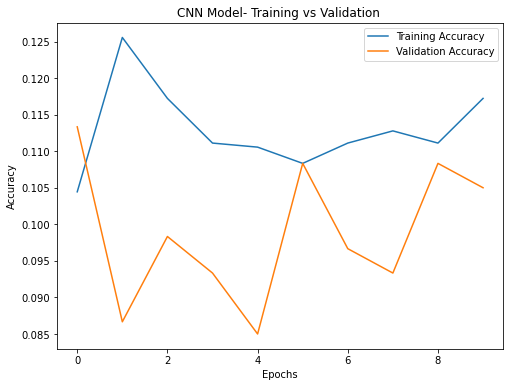

In [19]:
## Plotting the graph to compare the accuracy 
plt.figure(figsize=[8,6])
plt.plot(cnn_v1_history_luiz.history['accuracy'])
plt.plot(cnn_v1_history_luiz.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model- Training vs Validation ')
plt.show()

In [20]:
## Evaluating the model
## Test Loss and accuracy
test_loss, test_acc = cnn_v1_model_luiz.evaluate(x_test_luiz,y_test_luiz, verbose=2)
print("\nTest Test accuracy:", test_acc)
print("\nTest Loss:", test_loss)

19/19 - 0s - loss: 2.3084 - accuracy: 0.0900 - 48ms/epoch - 3ms/step

Test Test accuracy: 0.09000000357627869

Test Loss: 2.3083982467651367


In [21]:
## Validation loss and accuracy
val_loss, val_acc = cnn_v1_model_luiz.evaluate(x_val_luiz,y_val_luiz, verbose=2)
print("\nTest Test accuracy:", val_acc)
print("\nTest Loss:", val_loss)

19/19 - 0s - loss: 2.3058 - accuracy: 0.1050 - 51ms/epoch - 3ms/step

Test Test accuracy: 0.10499999672174454

Test Loss: 2.305785655975342


In [22]:
## Checking predictions
cnn_predictions_luiz = cnn_v1_model_luiz.predict(x_val_luiz)
print("Predictions: \n",cnn_predictions_luiz)

Predictions: 
 [[0.08417696 0.0987348  0.12139862 ... 0.08982117 0.10603397 0.10658595]
 [0.08421064 0.09746088 0.12225904 ... 0.08821484 0.10123638 0.10911299]
 [0.08547869 0.09772304 0.11229704 ... 0.09356398 0.1095164  0.10998664]
 ...
 [0.07755556 0.09966928 0.11299293 ... 0.09594233 0.1103438  0.10509863]
 [0.08615289 0.09984358 0.11247174 ... 0.09454765 0.10493105 0.10402812]
 [0.0809505  0.09601593 0.11398583 ... 0.08836193 0.115753   0.11119333]]


In [23]:
## Imports for confusion matrix as sklearn, seaborn and matplotlib
import seaborn as sns;
from sklearn.metrics import confusion_matrix

## Sklearn confusion matrix
cnn_predictions_luiz = np.argmax(cnn_predictions_luiz, axis=1)
matrix_luiz = confusion_matrix(np.argmax(y_val_luiz, axis=1), cnn_predictions_luiz)
print(matrix_luiz)

[[ 0  0 50  0  0  0  0  0  1 10]
 [ 0  0 53  0  0  0  0  0  4 10]
 [ 0  0 49  0  0  0  0  0  4  4]
 [ 0  0 47  0  0  0  0  0  7  7]
 [ 0  0 59  0  0  0  0  0  5  6]
 [ 0  0 50  0  0  0  0  0  6  9]
 [ 0  0 37  0  0  0  1  0  3 15]
 [ 0  0 38  0  0  0  0  0  3  7]
 [ 0  0 43  0  0  0  0  0  5 11]
 [ 0  0 44  0  0  0  0  0  4  8]]


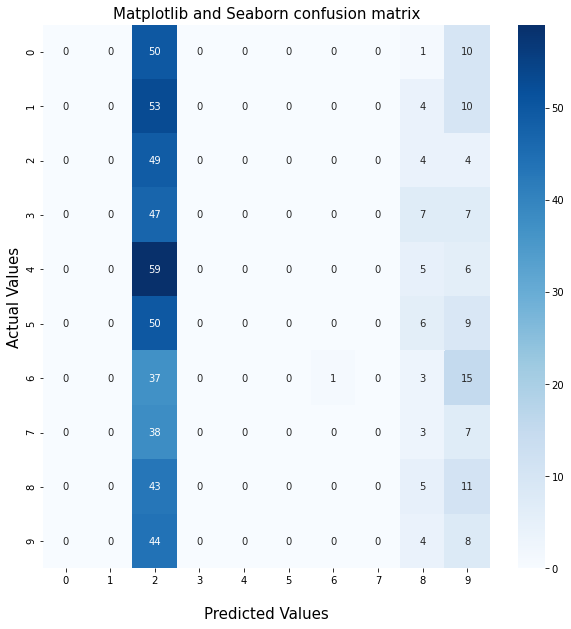

In [24]:
## Matplotlib and seaborn
figure = plt.figure(figsize=(10,10))
sns.heatmap(matrix_luiz, annot=True, cmap=plt.cm.Blues)
plt.title('Matplotlib and Seaborn confusion matrix',fontsize=15);
plt.xlabel('\nPredicted Values',fontsize=15)
plt.ylabel('Actual Values',fontsize=15);

In [25]:
## Adding noise to unsupervised dataset
pure = unsupervised_train_luiz 
pure_test = unsupervised_val_luiz 
noise = np.random.normal(0, 1, pure.shape) 
noise_test = np.random.normal(0, 1, pure_test.shape) 
x_train_noisy_luiz = pure + 0.2 * noise 
x_val_noisy_luiz = pure_test + 0.2 * noise_test

In [26]:
## Clipping the values of noisy dataset
x_train_noisy_luiz = tf.clip_by_value(x_train_noisy_luiz, clip_value_min=0,clip_value_max=1, name=None)
x_val_noisy_luiz = tf.clip_by_value(x_val_noisy_luiz, clip_value_min=0,clip_value_max=1, name=None)

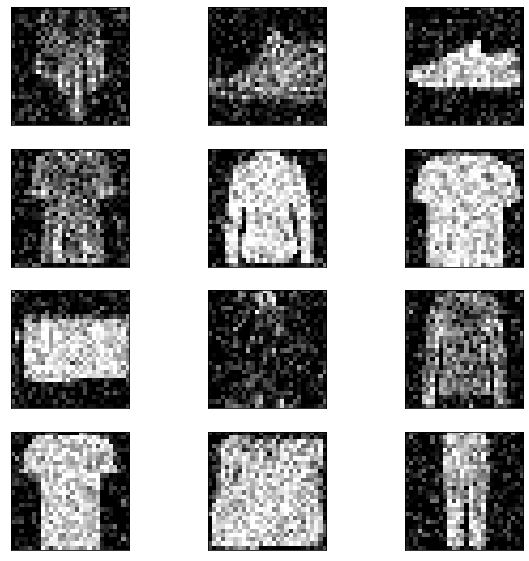

In [27]:
Plotting images to check the noise
plt.figure(figsize=(10,10))
def plot_image(x, plot_image):
    for i in range(12):
      plt.subplot(4,3, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(plot_image[i], cmap=plt.get_cmap('gray'))
plot_image(plot_image,x_val_noisy_luiz)
plt.show()

In [28]:
## Imports for Encoder & Decoder
from keras import backend as K
from keras.layers import Input, Conv2DTranspose
from keras.models import Model

## Defining Image inputs
img_width = 28
img_height = 28

In [29]:
## Using K as backend to reshape the data to the correct format, in order for the model to become backend-agnostic
if K.image_data_format() == 'channels_first': 
    unsupervised_train_luiz = unsupervised_train_luiz.reshape(unsupervised_train_luiz.shape[0], 1, img_width, 
img_height) 
    unsupervised_val_luiz = unsupervised_val_luiz.reshape(unsupervised_val_luiz.shape[0], 1, img_width, 
img_height) 
    input_shape = (1, img_width, img_height) 
else: 
    unsupervised_train_luiz = unsupervised_train_luiz.reshape(unsupervised_train_luiz.shape[0], img_width, 
img_height, 1) 
    unsupervised_val_luiz = unsupervised_val_luiz.reshape(unsupervised_val_luiz.shape[0], img_width, 
img_height, 1) 
    input_shape = (img_width, img_height, 1) 

In [30]:
## Creating the model
#encoder_inputs = Input(shape=(None, n_input))
inputs_luiz = Input(shape=(input_shape))
print("inputs_luiz shape:\n",inputs_luiz)

inputs_luiz shape:
 KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [31]:
## Building encoder
e_luiz = Conv2D(16,(3,3), activation='relu',padding='same',strides=2)(inputs_luiz)
e_luiz = Conv2D(8,(3,3), activation='relu',padding='same',strides=2)(e_luiz)

## Building Ddecoder
d_luiz = Conv2DTranspose(8,(3,3), activation='relu',padding='same',strides=2)(e_luiz)
d_luiz = Conv2DTranspose(16, (3,3), activation='relu',padding='same',strides=2)(d_luiz)
output_luiz = Conv2D(1,(3,3), activation='relu',padding='same')(d_luiz)

autoencoder_luiz = Model(inputs_luiz, output_luiz)

In [32]:
## Compiling the model
autoencoder_luiz.compile(loss='mse',optimizer='adam')

## Printing model summary
autoencoder_luiz.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         145   

In [33]:
## Diagram
plot_model(autoencoder_luiz, to_file='autoencoder_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [34]:
## Fitting the model
autoencoder_history_luiz = autoencoder_luiz.fit(x_train_noisy_luiz, unsupervised_train_luiz, epochs=10,batch_size=256,validation_data=(x_val_noisy_luiz,unsupervised_val_luiz))

Epoch 1/10
223/223 [==============================] - 23s 100ms/step - loss: 0.0431 - val_loss: 0.0142
Epoch 2/10
223/223 [==============================] - 23s 104ms/step - loss: 0.0120 - val_loss: 0.0108
Epoch 3/10
223/223 [==============================] - 23s 102ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
223/223 [==============================] - 23s 102ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 5/10
223/223 [==============================] - 22s 98ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 6/10
223/223 [==============================] - 23s 104ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 7/10
223/223 [==============================] - 22s 98ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 8/10
223/223 [==============================] - 22s 98ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 9/10
223/223 [==============================] - 22s 99ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 10/10
223/223 [==============================] - 22s 97ms/step - loss: 

In [35]:
## Predictions
autoencoder_predictions_luiz = autoencoder_luiz.predict(x_val_noisy_luiz)
print("Predictions: \n",autoencoder_predictions_luiz)

Predictions: 
 [[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.02443265]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.09992369]
   [0.10002424]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.  

In [36]:
## Preparing the plot images
number_of_visualizations = 10
samples = x_val_noisy_luiz[:number_of_visualizations] 
targets = test_y[:number_of_visualizations] 
denoised_images = autoencoder_luiz.predict(samples)

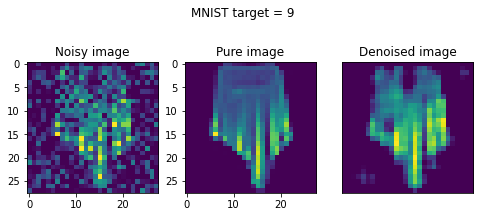

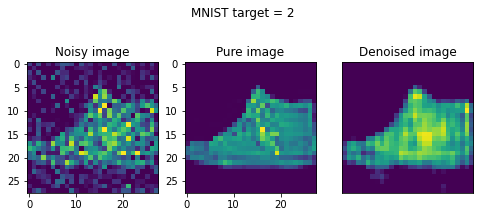

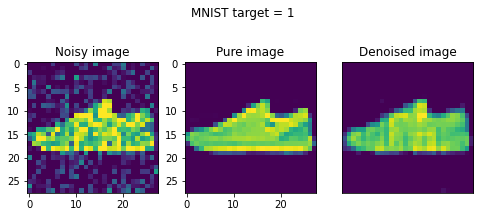

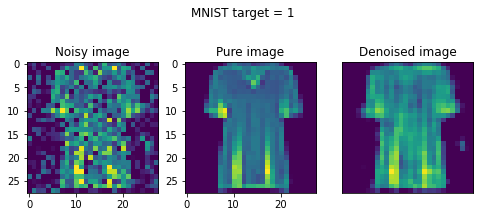

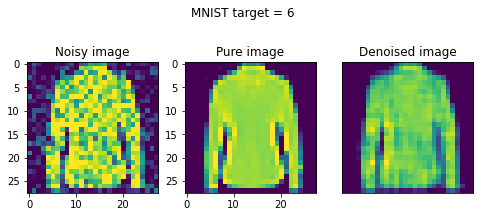

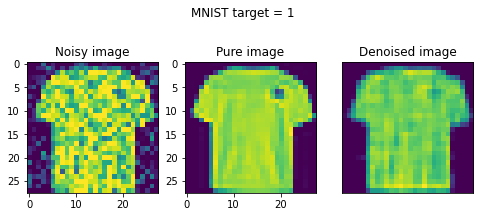

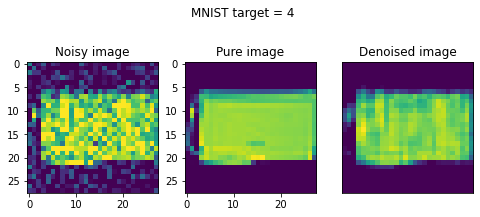

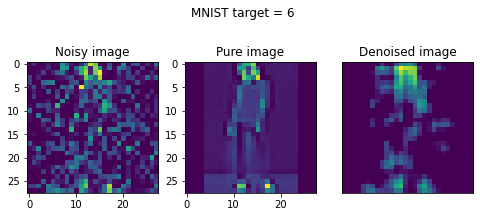

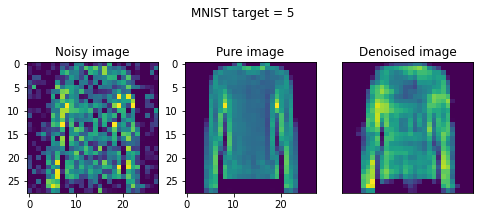

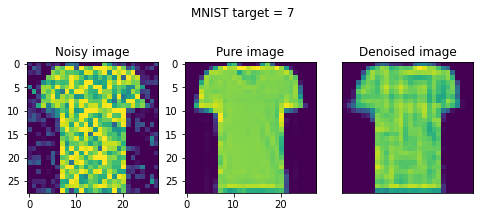

In [37]:
## Plotining denoise images
for i in range(0, number_of_visualizations): 
  # Get the sample and the reconstruction 
  noisy_image = x_val_noisy_luiz[i][:, :] 
  pure_image  = pure_test[i][:, :] 
  denoised_image = denoised_images[i][:, :, 0] 
  input_class = targets[i] 
  # Matplotlib preparations 
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5) 
  # Plot sample and reconstruciton 
  axes[0].imshow(noisy_image) 
  axes[0].set_title('Noisy image') 
  axes[1].imshow(pure_image) 
  axes[1].set_title('Pure image') 
  axes[2].imshow(denoised_image) 
  axes[2].set_title('Denoised image') 
  fig.suptitle(f'MNIST target = {input_class}')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [39]:
## Building CNN with Autoencoder
cnn_v2_luiz = Sequential()
cnn_v2_luiz.add(autoencoder_luiz.get_layer('input_1'))
cnn_v2_luiz.add(autoencoder_luiz.get_layer('conv2d_2'))
cnn_v2_luiz.add(Flatten())
cnn_v2_luiz.add(Dense(100))
cnn_v2_luiz.add(Dense(10, activation='softmax'))

In [40]:
## Compiling the model
cnn_v2_luiz.compile(loss=tensorflow.keras.losses.categorical_crossentropy,optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy']) 

In [41]:
## Model Summary
cnn_v2_luiz.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               313700    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 314,870
Trainable params: 314,870
Non-trainable params: 0
_________________________________________________________________


In [42]:
## Diagram
plot_model(cnn_v2_luiz, to_file='cnn_with_autoencoder.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [43]:
## Fitting the model
cnn_v2_history_luiz = cnn_v2_luiz.fit(
    x_train_luiz, y_train_luiz, epochs=10,batch_size=256,validation_data=(x_val_luiz, y_val_luiz))

Epoch 1/10
8/8 [==============================] - 0s 29ms/step - loss: 3.0114 - accuracy: 0.1078 - val_loss: 2.9354 - val_accuracy: 0.0950
Epoch 2/10
8/8 [==============================] - 0s 19ms/step - loss: 2.5859 - accuracy: 0.1033 - val_loss: 2.6938 - val_accuracy: 0.1017
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 2.4417 - accuracy: 0.1344 - val_loss: 2.5316 - val_accuracy: 0.1050
Epoch 4/10
8/8 [==============================] - 0s 20ms/step - loss: 2.3881 - accuracy: 0.1333 - val_loss: 2.4305 - val_accuracy: 0.0883
Epoch 5/10
8/8 [==============================] - 0s 18ms/step - loss: 2.2860 - accuracy: 0.1661 - val_loss: 2.4637 - val_accuracy: 0.0967
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 2.2748 - accuracy: 0.1806 - val_loss: 2.4286 - val_accuracy: 0.0950
Epoch 7/10
8/8 [==============================] - 0s 16ms/step - loss: 2.2392 - accuracy: 0.1883 - val_loss: 2.4048 - val_accuracy: 0.0900
Epoch 8/10
8/8 [===========

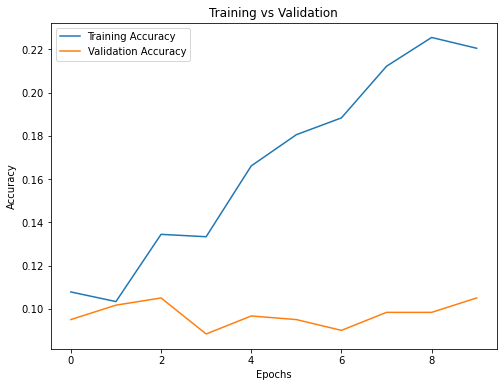

In [44]:
## Plotting the training vs validation acurracy of the CNN model
plt.figure(figsize=[8,6])
plt.plot(cnn_v2_history_luiz.history['accuracy'])
plt.plot(cnn_v2_history_luiz.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation')
plt.show()

In [45]:
## Evaluating the model
## Test Loss and accuracy
test_loss_cnn, test_acc_cnn = cnn_v2_luiz.evaluate(x_test_luiz,y_test_luiz, verbose=2)
print("\nTest Test accuracy:", test_acc_cnn)
print("\nTest Loss:", test_loss_cnn)

19/19 - 0s - loss: 2.4648 - accuracy: 0.0883 - 56ms/epoch - 3ms/step

Test Test accuracy: 0.08833333104848862

Test Loss: 2.4648215770721436


In [46]:
## Predicting the model
cnn_predictions2_luiz = cnn_v2_luiz.predict(x_test_luiz)
print("Predictions: \n",cnn_predictions2_luiz)

Predictions: 
 [[0.03078874 0.07253558 0.14224423 ... 0.05019497 0.07459297 0.12874283]
 [0.06688567 0.0807501  0.12243982 ... 0.06209466 0.13255285 0.081604  ]
 [0.15461774 0.11382426 0.09223721 ... 0.04717295 0.09979855 0.0625049 ]
 ...
 [0.02711896 0.06202434 0.10614178 ... 0.05954355 0.06461459 0.05822808]
 [0.08173443 0.0893686  0.09967528 ... 0.10966015 0.0874286  0.15198739]
 [0.08114745 0.07814597 0.21749096 ... 0.03355676 0.08337691 0.07969275]]


In [47]:
## Plotting confusion matrix
cnn_predictions2_luiz = np.argmax(cnn_predictions2_luiz, axis=1)
matrix_luiz2 = confusion_matrix(np.argmax(y_test_luiz, axis=1), cnn_predictions2_luiz)
print(matrix_luiz2)

[[ 1  3  7  3  3  7 24  7  3  3]
 [ 1  4 17  3  6  8 13  2  5  6]
 [ 0  5 10  1  3 12 20  2  2  2]
 [ 3  4 10  0  2  9 18  3  8  4]
 [ 1  4 14  0  5  8 12  6  4  2]
 [ 0  7  9  2  3  9 21  2  9  4]
 [ 0  5  9  1  2  9 11  3  7  4]
 [ 0 10  9  1  4  4 21  3  3  1]
 [ 0  3 12  2  5 11 17  3  6  5]
 [ 1  6  8  4  5 12 17  3  3  4]]


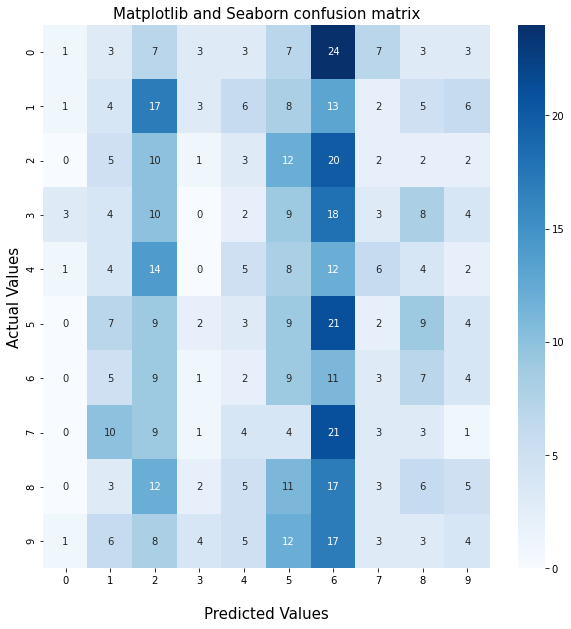

In [48]:
## Matplotlib and seaborn
figure = plt.figure(figsize=(10,10))
sns.heatmap(matrix_luiz2, annot=True, cmap=plt.cm.Blues)
plt.title('Matplotlib and Seaborn confusion matrix',fontsize=15);
plt.xlabel('\nPredicted Values',fontsize=15)
plt.ylabel('Actual Values',fontsize=15);

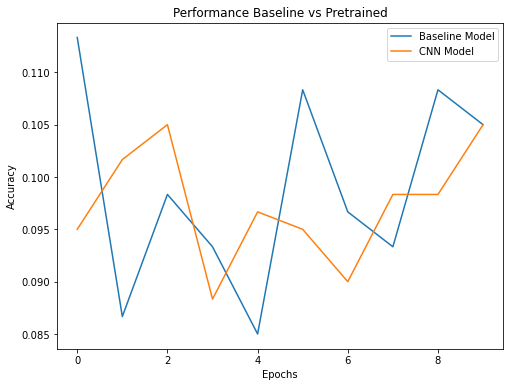

In [49]:
## Plotting the performance of the baseline CNN model to the pretrained model
plt.figure(figsize=[8,6])
plt.plot(cnn_v1_history_luiz.history['val_accuracy'])
plt.plot(cnn_v2_history_luiz.history['val_accuracy'])
plt.legend(['Baseline Model', 'CNN Model'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Performance Baseline vs Pretrained')
plt.show()

In [50]:
## Comparing accuracy from both models
print("\nTest test accuracy Baseline:", test_acc)
print("\nTest test accuracy CNN:", test_acc_cnn)


Test test accuracy Baseline: 0.09000000357627869

Test test accuracy CNN: 0.08833333104848862
